# Model `BinaryMFPenalty`

In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# from generators import BlockDiagonalMatrixGenerator

# n_row, n_col, k, seed = 300, 500, 5, None

# data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.2, 0.1, 0.2, 0.1])
# data.generate(seed=seed) # if no seed assigned, use time instead

# data.show_matrix(title="gen_diag_sorted")

In [11]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [12]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 2023


In [13]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

In [14]:
from models import NMFSklearn

k = 5

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

[I] k            : 5
[I] U            : None
[I] V            : None
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] init_method  : nndsvd
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.


In [15]:
U, V = model_nmf.U, model_nmf.V

# Init with `NMFSklearn`

Since the regularizer `reg` grows at a rate of `reg_growth`， the total `error` might be constantly increasing. The `reg_error` is decreasing and is considered the convergence indicator.

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : mask
[I] reg          : 1
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] reg_growth   : 3
[I] task         : prediction
[I] display      : True
[I] max U: 2.987, max V: 1.660
[I] max U: 1.350, max V: 1.350
[W] Stopped in advance: Error lower than tolerance


\
                                                                      
                 time iter         error    rec_error           reg   
0   29/04/24 12:37:22    0  4.069054e+03  4045.413939  1.000000e+00   
1   29/04/24 12:37:22    1  2.530694e+03  2494.094599  1.000000e+00   
2   29/04/24 12:37:23    2  2.489165e+03  2390.773965  3.000000e+00   
3   29/04/24 12:37:23    3  2.633713e+03  2374.289734  9.000000e+00   
4   29/04/24 12:37:24    4  3.062806e+03  2400.045068  2.700000e+01   
5   29/04/24 12:37:25    5  4.105266e+03  2481.643094  8.100000e+01   
6   29/04/24 12:37:25    6  6.479543e+03  2642.271062  2.430000e+02   
7   29/04/24 12:37:26    7  1.178936e+04  2876.263809  7.290000e+02   
8   29/04/24 12:37:26    8  2.386851e+04  3134.225777  2.187000e+03   
9   29/04/24 12:37:27    9  5.188377e+04  3367.991269  6.561000e+03   
10  29/04/24 12:37:27   10  1.177288e+05  3567.066439  1.968300e+04   
11  29/04/24 12:37:28   11  2.724331e+05  3739.323368  5.904900e+04   
12  29/04/24 12:37:28   12  6.293742e+05  3891.319420  1.771470e+05   
13  29/04/24 12:37:29   13  1.439042e+06  4021.251958  5.314410e+05   
14  29/04/24 12:37:29   14  3.293191e+06  4126.395040  1.594323e+06   
15  29/04/24 12:37:30   15  7.574581e+06  4207.390651  4.782969e+06   
16  29/04/24 12:37:30   16  1.744149e+07  4271.785992  1.434891e+07   
17  29/04/24 12:37:31   17  3.983647e+07  4327.383998  4.304672e+07   
18  29/04/24 12:37:31   18  8.985923e+07  4375.120096  1.291402e+08   
19  29/04/24 12:37:31   19  2.016086e+08  4415.277071  3.874205e+08   
20  29/04/24 12:37:32   20  4.507440e+08  4450.946675  1.162261e+09   
21  29/04/24 12:37:32   21  1.007387e+09  4481.514622  3.486784e+09   
22  29/04/24 12:37:33   22  2.294784e+09  4504.179765  1.046035e+10   
23  29/04/24 12:37:33   23  5.284684e+09  4518.556536  3.138106e+10   
24  29/04/24 12:37:34   24  1.194675e+10  4528.474410  9.414318e+10   
25  29/04/24 12:37:34   25  2.661392e+10  4536.572552  2.824295e+11   
26  29/04/24 12:37:35   26  6.065186e+10  4543.224233  8.472886e+11   
27  29/04/24 12:37:35   27  1.393816e+11  4548.463326  2.541866e+12   
28  29/04/24 12:37:36   28  3.156062e+11  4552.726322  7.625597e+12   
29  29/04/24 12:37:36   29  6.955751e+11  4556.229432  2.287679e+13   
30  29/04/24 12:37:37   30  1.471755e+12  4559.048322  6.863038e+13   
31  29/04/24 12:37:37   31  2.949606e+12  4561.252821  2.058911e+14   
32  29/04/24 12:37:38   32  5.544883e+12  4562.924436  6.176734e+14   
33  29/04/24 12:37:38   33  9.745656e+12  4564.155513  1.853020e+15   
34  29/04/24 12:37:39   34  1.607362e+13  4565.039679  5.559061e+15   

                  train                                     val            \
                      0                                       0             
    reg_error    Recall Precision  Accuracy        F1    Recall Precision   
0   47.280745  0.194234  0.882850  0.584230  0.318414  0.129182  0.885350   
1   73.199123  0.527302  0.774439  0.686861  0.627411  0.432156  0.727700   
2   65.593958  0.568487  0.762202  0.695563  0.651244  0.494424  0.710280   
3   57.649662  0.589079  0.758857  0.700943  0.663276  0.509294  0.700767   
4   49.093429  0.598113  0.759959  0.704597  0.669393  0.513941  0.700887   
5   40.089461  0.599442  0.760236  0.705195  0.670331  0.516729  0.702020   
6   31.582488  0.602365  0.758701  0.705394  0.671554  0.523234  0.704631   
7   24.452937  0.607015  0.757586  0.706390  0.673993  0.526952  0.705224   
8   18.961394  0.611930  0.756819  0.707652  0.676706  0.530669  0.702337   
9   14.789141  0.611930  0.756819  0.707652  0.676706  0.530669  0.702337   
10  11.600030  0.611930  0.756819  0.707652  0.676706  0.530669  0.702337   
11   9.100706  0.611930  0.756819  0.707652  0.676706  0.530669  0.702337   
12   7.061738  0.611930  0.756819  0.707652  0.676706  0.530669  0.702337   
13   5.400490  0.611930  0.756819  0.707652  0.676706  0.530669  0.702337   
14   4.125971  0.611930  0.756819  0.707652  0.676706  0.5306

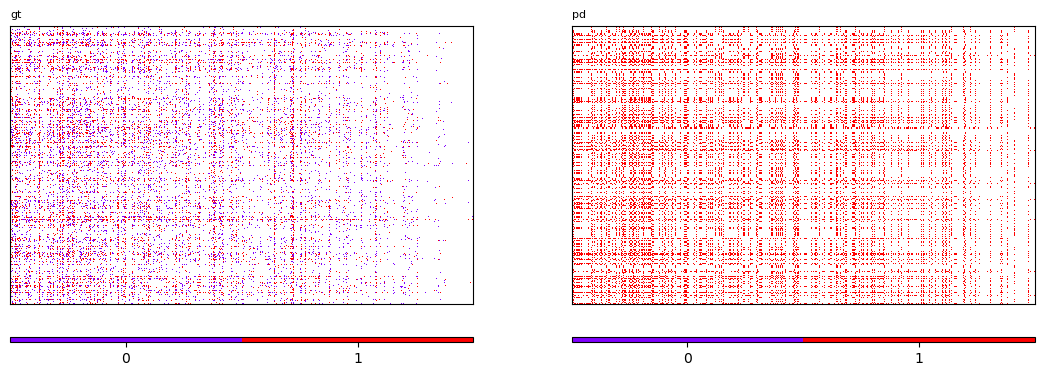

In [16]:
from models import BinaryMFPenalty

k = 5
reg = 1
reg_growth = 3

model = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=True)

# Init randomly

[I] k            : 5
[I] U            : None
[I] V            : None
[I] W            : mask
[I] reg          : 1
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] reg_growth   : 3
[I] task         : prediction
[I] display      : True
[I] max U: 0.353, max V: 0.441
[I] max U: 0.367, max V: 0.367
[W] Stopped in advance: Error lower than tolerance


\
                                                                      
                 time iter         error    rec_error           reg   
0   29/04/24 12:55:29    0  7.091817e+03  7077.387950  1.000000e+00   
1   29/04/24 12:55:29    1  3.643151e+03  3549.209483  1.000000e+00   
2   29/04/24 12:55:30    2  3.560326e+03  3415.909536  3.000000e+00   
3   29/04/24 12:55:31    3  3.754859e+03  3400.326722  9.000000e+00   
4   29/04/24 12:55:31    4  4.318624e+03  3454.962697  2.700000e+01   
5   29/04/24 12:55:32    5  5.641585e+03  3650.963937  8.100000e+01   
6   29/04/24 12:55:32    6  8.454641e+03  4135.505410  2.430000e+02   
7   29/04/24 12:55:33    7  1.404757e+04  4964.399539  7.290000e+02   
8   29/04/24 12:55:34    8  2.519548e+04  5884.218976  2.187000e+03   
9   29/04/24 12:55:34    9  4.836252e+04  6546.780338  6.561000e+03   
10  29/04/24 12:55:34   10  9.760807e+04  6903.397719  1.968300e+04   
11  29/04/24 12:55:35   11  2.044947e+05  7083.303563  5.904900e+04   
12  29/04/24 12:55:35   12  4.400330e+05  7174.021490  1.771470e+05   
13  29/04/24 12:55:36   13  9.637229e+05  7223.313557  5.314410e+05   
14  29/04/24 12:55:36   14  2.120564e+06  7255.168292  1.594323e+06   
15  29/04/24 12:55:37   15  4.660739e+06  7276.490867  4.782969e+06   
16  29/04/24 12:55:37   16  1.010562e+07  7286.003119  1.434891e+07   
17  29/04/24 12:55:38   17  2.147965e+07  7290.402193  4.304672e+07   
18  29/04/24 12:55:38   18  4.565933e+07  7293.896787  1.291402e+08   
19  29/04/24 12:55:39   19  9.653131e+07  7296.773107  3.874205e+08   
20  29/04/24 12:55:39   20  1.997196e+08  7298.993690  1.162261e+09   
21  29/04/24 12:55:40   21  4.195255e+08  7300.663548  3.486784e+09   
22  29/04/24 12:55:40   22  9.197886e+08  7301.900173  1.046035e+10   
23  29/04/24 12:55:41   23  2.015543e+09  7302.799664  3.138106e+10   
24  29/04/24 12:55:41   24  4.291263e+09  7303.446633  9.414318e+10   
25  29/04/24 12:55:42   25  8.750549e+09  7303.909152  2.824295e+11   
26  29/04/24 12:55:42   26  1.690766e+10  7304.238445  8.472886e+11   
27  29/04/24 12:55:43   27  3.076076e+10  7304.471826  2.541866e+12   
28  29/04/24 12:55:44   28  5.263862e+10  7304.636231  7.625597e+12   
29  29/04/24 12:55:44   29  8.506808e+10  7304.751167  2.287679e+13   

                   train                                     val            \
                       0                                       0             
     reg_error    Recall Precision  Accuracy        F1    Recall Precision   
0    28.857206  0.000000  0.000000  0.500000  0.000000  0.000000  0.000000   
1   187.882950  0.025641  0.720149  0.507838  0.049519  0.021375  0.696970   
2    96.277604  0.045304  0.719409  0.513817  0.085239  0.041822  0.703125   
3    78.784959  0.045968  0.726891  0.514348  0.086468  0.041822  0.692308   
4    63.974890  0.046765  0.728778  0.514680  0.087890  0.042751  0.696970   
5    49.151139  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
6    35.548442  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
7    24.919535  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
8    17.660047  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
9    12.746758  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
10    9.216550  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
11    6.686360  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
12    4.887003  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
13    3.599646  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
14    2.651042  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
15    1.945847  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
16    1.407541  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
17    0.997631  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
18    0.707015  0.046898  0.729339  0.514747  0.088129  0.042751  0.696970   
19    0.4

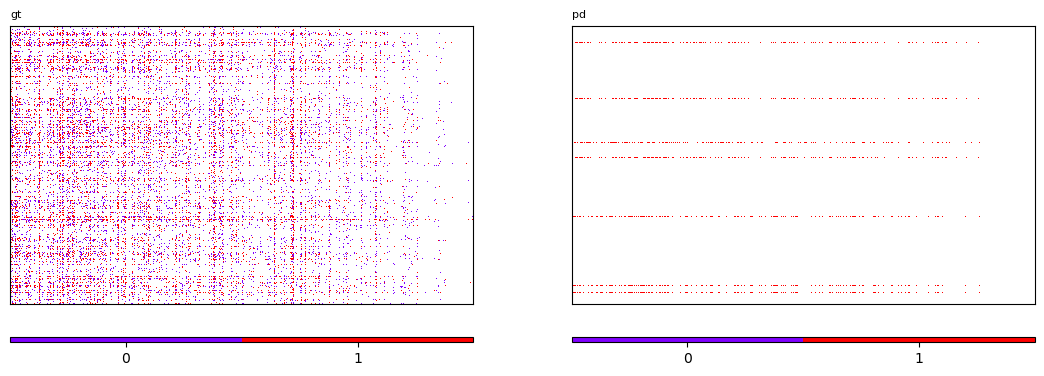

In [18]:
k = 5
reg = 1
reg_growth = 3
init_method = 'normal'
# init_method = 'uniform'

model = BinaryMFPenalty(k=k, U=None, V=None, reg=reg, reg_growth=reg_growth, init_method=init_method, max_iter=100, seed=2024)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=True)